In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

f = 'greek_rallies_2023_stages_times.csv'

/home/ilias/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv(f)
data = data[data['Gr/Cl'].str.startswith('C')]
data

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,SS.
0,Peroulak,C2,1,Achaios,24/9/2023,Tarmac,Cup,1,392.82,392.82,Achaios_01
1,Koukeas,C1,1,Achaios,24/9/2023,Tarmac,Cup,2,394.87,392.82,Achaios_01
3,Karathan,C5 F2,1,Achaios,24/9/2023,Tarmac,Cup,4,408.80,392.82,Achaios_01
4,Daskalop,C2,1,Achaios,24/9/2023,Tarmac,Cup,5,409.94,392.82,Achaios_01
5,Dermas V,C3 F2,1,Achaios,24/9/2023,Tarmac,Cup,6,411.92,392.82,Achaios_01
...,...,...,...,...,...,...,...,...,...,...,...
2421,Yiangou,C2,5,Stereas,4/6/2023,Gravel,Championship,23,1287.92,970.14,Stereas_05
2422,Andrikop,C5 F2,5,Stereas,4/6/2023,Gravel,Championship,24,1412.87,970.14,Stereas_05
2423,Vassilak,C1,5,Stereas,4/6/2023,Gravel,Championship,25,1525.70,970.14,Stereas_05
2424,Giokaris,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,26,1562.13,970.14,Stereas_05


In [4]:
data['GroupC'] = data['Gr/Cl'].str[:2]
data
min_value_G = data.groupby(['Race', 'ss', 'GroupC'])['time_SS_sec'].min()
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2_G

min_time_Gr
Race    ss GroupC             
Achaios 1  C1           394.87
           C2           392.82
           C3           411.92
           C4           483.04
           C5           408.80
...                        ...
Stereas 5  C2          1014.02
           C3          1088.19
           C4          1110.57
           C5          1227.75
           C6          1185.78

[447 rows x 1 columns]

In [11]:
data2 = data.merge(min_value2_G, on=['Race', 'ss', 'GroupC'])
data2

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,SS.,GroupC,min_time_Gr
0,Peroulak,C2,1,Achaios,24/9/2023,Tarmac,Cup,1,392.82,392.82,Achaios_01,C2,392.82
1,Daskalop,C2,1,Achaios,24/9/2023,Tarmac,Cup,5,409.94,392.82,Achaios_01,C2,392.82
2,Papadopo,C2,1,Achaios,24/9/2023,Tarmac,Cup,10,425.84,392.82,Achaios_01,C2,392.82
3,Kandilio,C2,1,Achaios,24/9/2023,Tarmac,Cup,11,427.63,392.82,Achaios_01,C2,392.82
4,Labropou,C2,1,Achaios,24/9/2023,Tarmac,Cup,18,444.10,392.82,Achaios_01,C2,392.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,Panagiot,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,17,1201.82,970.14,Stereas_05,C6,1185.78
2109,Stavropo,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,19,1209.73,970.14,Stereas_05,C6,1185.78
2110,Giokaris,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,26,1562.13,970.14,Stereas_05,C6,1185.78
2111,Delaport,C5 F2,5,Stereas,4/6/2023,Gravel,Championship,22,1227.75,970.14,Stereas_05,C5,1227.75


In [12]:
data2GravelCup = data2[(data2['surface']=='Gravel') & (data2['competition']=='Cup')]
data2GravelCup
data2GravelCahmp = data2[(data2['surface']=='Gravel') & (data2['competition']=='Championship')]
data2GravelCahmp

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,SS.,GroupC,min_time_Gr
498,Papadimi,C1,1,Fthinoporino,1/10/2023,Gravel,Championship,1,410.25,410.25,Fthinoporino_01,C1,410.25
499,Kechagia,C1,1,Fthinoporino,1/10/2023,Gravel,Championship,2,419.42,410.25,Fthinoporino_01,C1,410.25
500,Kirkos P,C2,1,Fthinoporino,1/10/2023,Gravel,Championship,3,438.35,410.25,Fthinoporino_01,C2,438.35
501,Ismailos,C2,1,Fthinoporino,1/10/2023,Gravel,Championship,5,451.80,410.25,Fthinoporino_01,C2,438.35
502,Theochar,C2,1,Fthinoporino,1/10/2023,Gravel,Championship,10,469.15,410.25,Fthinoporino_01,C2,438.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,Panagiot,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,17,1201.82,970.14,Stereas_05,C6,1185.78
2109,Stavropo,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,19,1209.73,970.14,Stereas_05,C6,1185.78
2110,Giokaris,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,26,1562.13,970.14,Stereas_05,C6,1185.78
2111,Delaport,C5 F2,5,Stereas,4/6/2023,Gravel,Championship,22,1227.75,970.14,Stereas_05,C5,1227.75


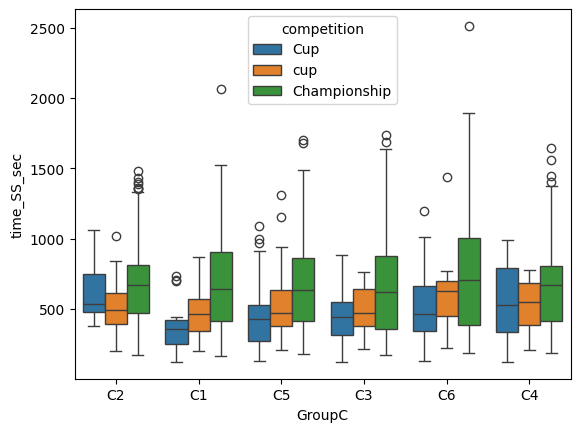

In [13]:
sns.boxplot(x="GroupC", y="time_SS_sec", data=(data2), hue=('competition'))

plt.show()

In [14]:
data2


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,SS.,GroupC,min_time_Gr
0,Peroulak,C2,1,Achaios,24/9/2023,Tarmac,Cup,1,392.82,392.82,Achaios_01,C2,392.82
1,Daskalop,C2,1,Achaios,24/9/2023,Tarmac,Cup,5,409.94,392.82,Achaios_01,C2,392.82
2,Papadopo,C2,1,Achaios,24/9/2023,Tarmac,Cup,10,425.84,392.82,Achaios_01,C2,392.82
3,Kandilio,C2,1,Achaios,24/9/2023,Tarmac,Cup,11,427.63,392.82,Achaios_01,C2,392.82
4,Labropou,C2,1,Achaios,24/9/2023,Tarmac,Cup,18,444.10,392.82,Achaios_01,C2,392.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,Panagiot,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,17,1201.82,970.14,Stereas_05,C6,1185.78
2109,Stavropo,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,19,1209.73,970.14,Stereas_05,C6,1185.78
2110,Giokaris,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,26,1562.13,970.14,Stereas_05,C6,1185.78
2111,Delaport,C5 F2,5,Stereas,4/6/2023,Gravel,Championship,22,1227.75,970.14,Stereas_05,C5,1227.75


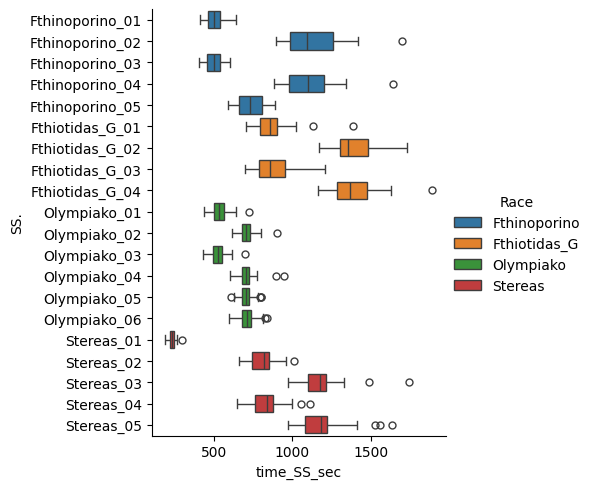

In [15]:
figsize=(140, 140)
exp_plot = sns.catplot(data=data2GravelCahmp, kind="box", x="time_SS_sec", y='SS.', hue='Race')
#exp_plot.figure.savefig('output_figure.png',dpi=600)

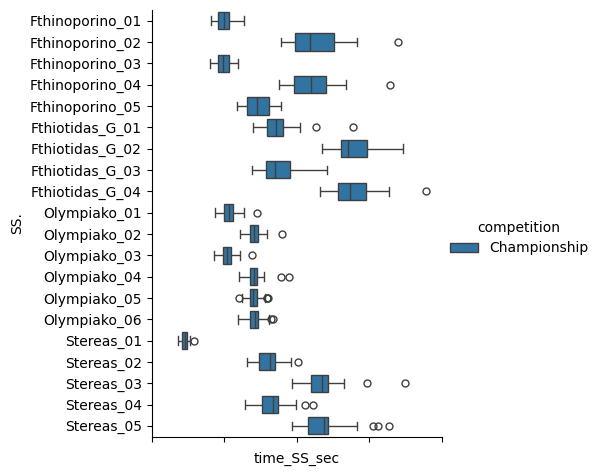

In [16]:
s = sns.catplot(data=data2GravelCahmp, kind="box", x="time_SS_sec", y='SS.', hue='competition').set_xticklabels([])
#s = sns.catplot(data=data2GravelC6Cup, kind="box", y="time_SS_sec", x='SS.', hue='competition').set_xticklabels([])
plt.show()

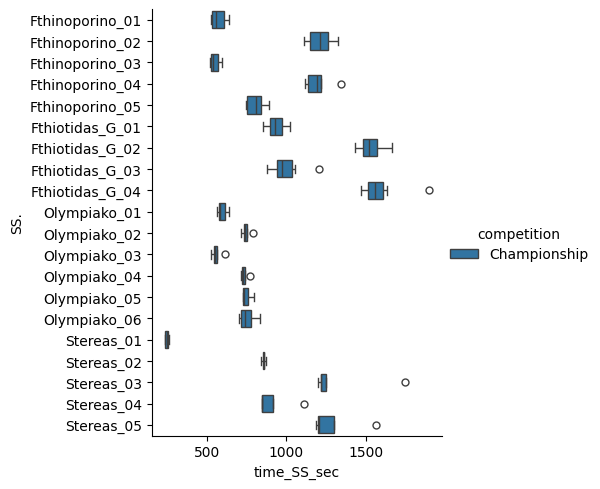

In [17]:
data2GravelC6Cha = data2[(data2['surface']=='Gravel') & (data2['GroupC']=='C6') & (data2['competition']=='Championship')]
sns.catplot(data=data2GravelC6Cha, kind="box", x="time_SS_sec", y='SS.', hue='competition')

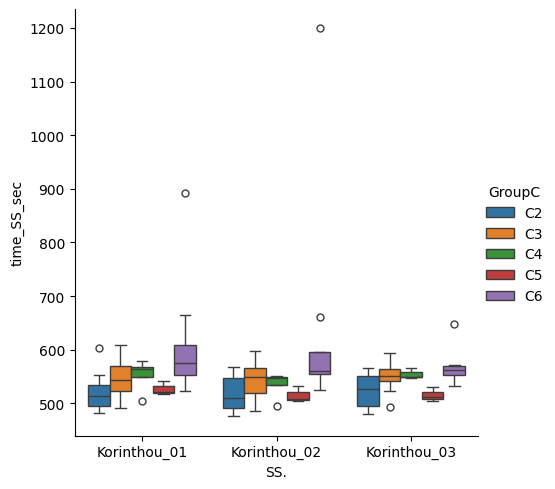

In [18]:
data2Korinthou = data2[(data2['Race']=='Korinthou')]
sns.catplot(data=data2Korinthou, kind="box", y="time_SS_sec", x='SS.', hue='GroupC')

In [19]:
displacedV =data2Korinthou['time_SS_sec']>700
displacedV =data2Korinthou['time_SS_sec']>625
data2KorinthouF = data2Korinthou[~displacedV]
data2KorinthouF

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,SS.,GroupC,min_time_Gr
1208,Ismailos,C2,1,Korinthou,21/10/2023,Gravel,Cup,1,482.56,482.56,Korinthou_01,C2,482.56
1209,Mider -,C2,1,Korinthou,21/10/2023,Gravel,Cup,2,485.99,482.56,Korinthou_01,C2,482.56
1210,Paradiss,C2,1,Korinthou,21/10/2023,Gravel,Cup,4,502.48,482.56,Korinthou_01,C2,482.56
1211,Zygogian,C2,1,Korinthou,21/10/2023,Gravel,Cup,7,513.24,482.56,Korinthou_01,C2,482.56
1212,Tsatsari,C2,1,Korinthou,21/10/2023,Gravel,Cup,8,515.27,482.56,Korinthou_01,C2,482.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,Englezos,C6 F2,3,Korinthou,21/10/2023,Gravel,Cup,23,568.44,479.64,Korinthou_03,C6,531.49
1291,Sotiropo,C6 F2,3,Korinthou,21/10/2023,Gravel,Cup,25,571.31,479.64,Korinthou_03,C6,531.49
1293,Anastass,C4 F2,3,Korinthou,21/10/2023,Gravel,Cup,11,546.45,479.64,Korinthou_03,C4,546.45
1294,Manetas,C4 F2,3,Korinthou,21/10/2023,Gravel,Cup,14,549.71,479.64,Korinthou_03,C4,546.45


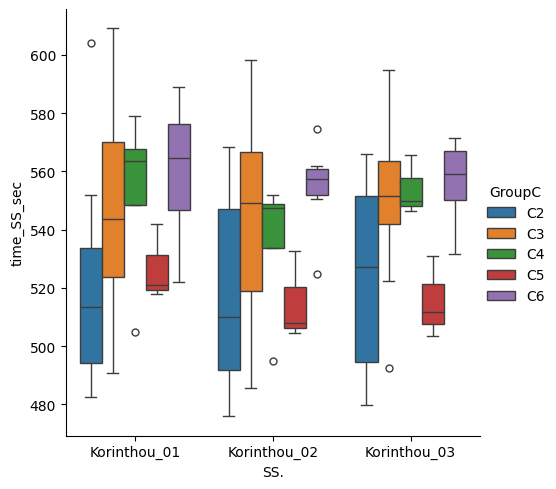

In [21]:
Korinthou_boxPlot = sns.catplot(data=data2KorinthouF, kind="box", y="time_SS_sec", x='SS.', hue='GroupC')
Korinthou_boxPlot.figure.savefig(data2KorinthouF.at[1208,'Race'] +'F_boxplot.png',dpi=600)

In [22]:
data2KorinthouF.reset_index(drop=True)

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,SS.,GroupC,min_time_Gr
0,Ismailos,C2,1,Korinthou,21/10/2023,Gravel,Cup,1,482.56,482.56,Korinthou_01,C2,482.56
1,Mider -,C2,1,Korinthou,21/10/2023,Gravel,Cup,2,485.99,482.56,Korinthou_01,C2,482.56
2,Paradiss,C2,1,Korinthou,21/10/2023,Gravel,Cup,4,502.48,482.56,Korinthou_01,C2,482.56
3,Zygogian,C2,1,Korinthou,21/10/2023,Gravel,Cup,7,513.24,482.56,Korinthou_01,C2,482.56
4,Tsatsari,C2,1,Korinthou,21/10/2023,Gravel,Cup,8,515.27,482.56,Korinthou_01,C2,482.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Englezos,C6 F2,3,Korinthou,21/10/2023,Gravel,Cup,23,568.44,479.64,Korinthou_03,C6,531.49
79,Sotiropo,C6 F2,3,Korinthou,21/10/2023,Gravel,Cup,25,571.31,479.64,Korinthou_03,C6,531.49
80,Anastass,C4 F2,3,Korinthou,21/10/2023,Gravel,Cup,11,546.45,479.64,Korinthou_03,C4,546.45
81,Manetas,C4 F2,3,Korinthou,21/10/2023,Gravel,Cup,14,549.71,479.64,Korinthou_03,C4,546.45


In [23]:
rallies = data2.Race.unique()
rallies

array(['Achaios', 'Aigio', 'Almiros', 'Boiotias', 'Deth', 'Fthinoporino',
       'Fthiotidas_G', 'Fthiotidas_T', 'Graikas', 'Kentavros',
       'Korinthou', 'Kritis', 'Livadia', 'Olympiako', 'Palladio',
       'Potamies', 'Stereas'], dtype=object)

/tmp/ipykernel_10279/3458593265.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s=df.iloc[0][3]
/tmp/ipykernel_10279/3458593265.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s=df.iloc[0][3]
/tmp/ipykernel_10279/3458593265.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s=df.iloc[0][3]
/tmp/ipykernel_10279/3458593265.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, i

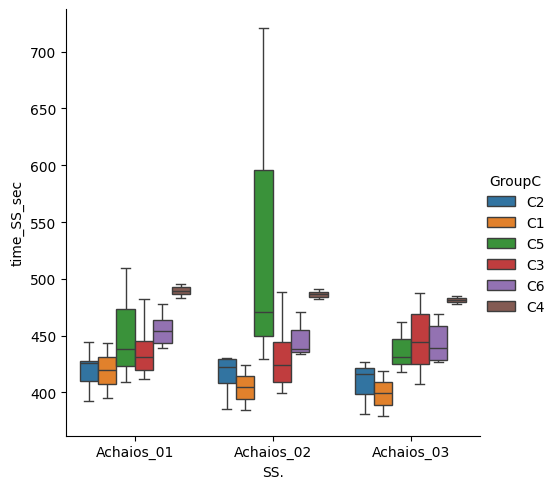

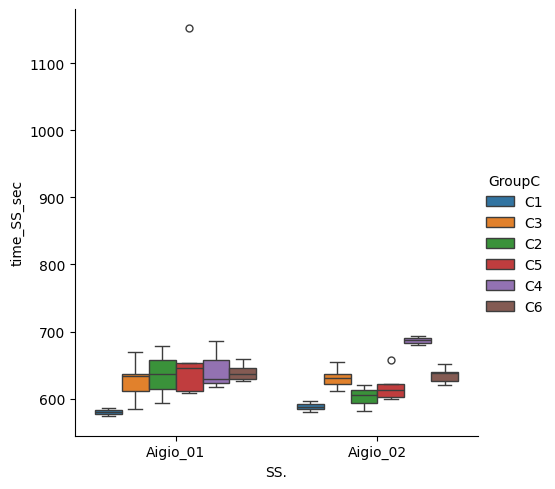

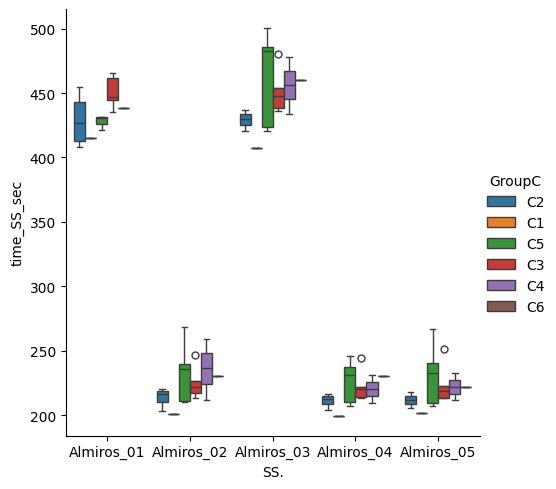

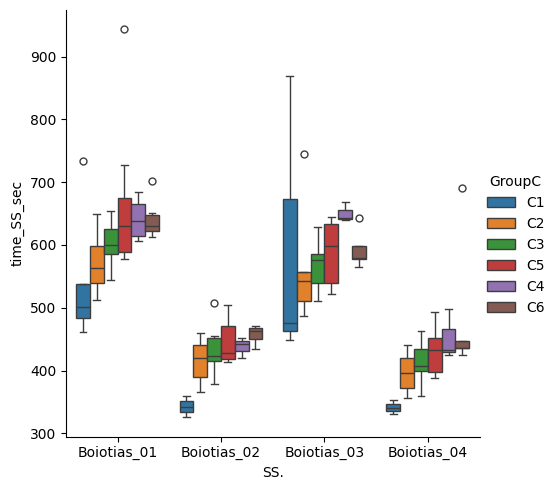

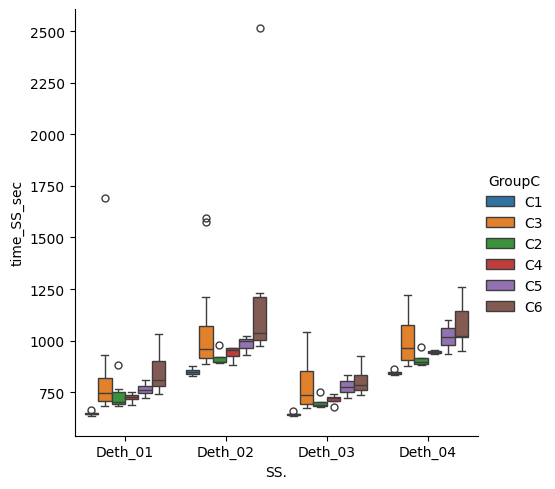

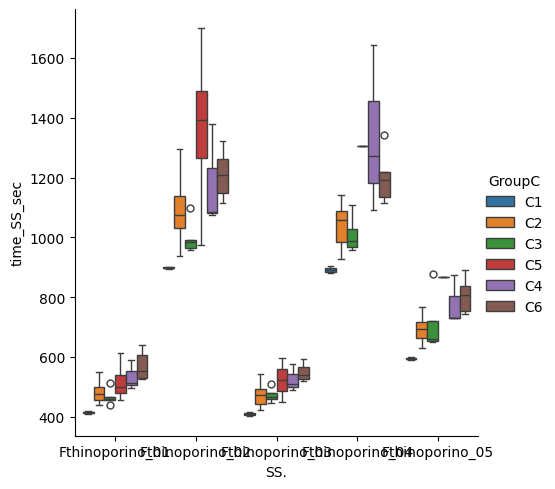

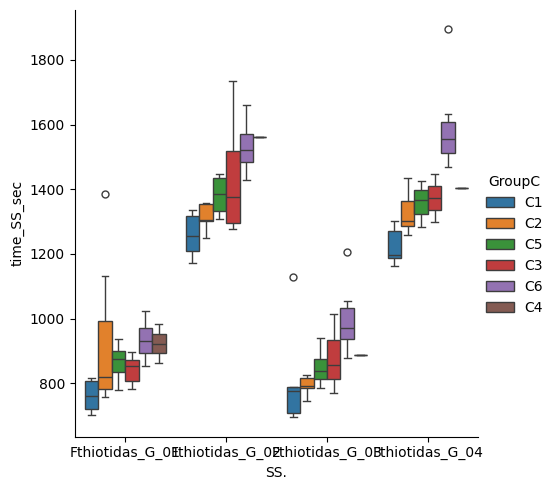

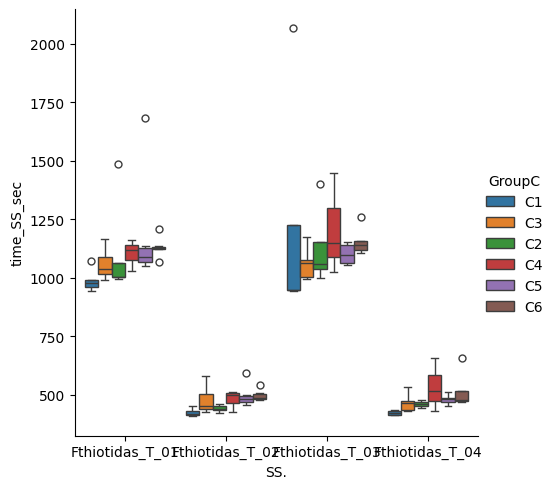

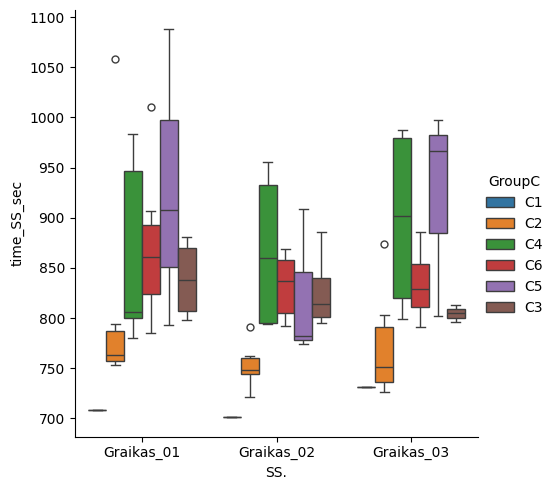

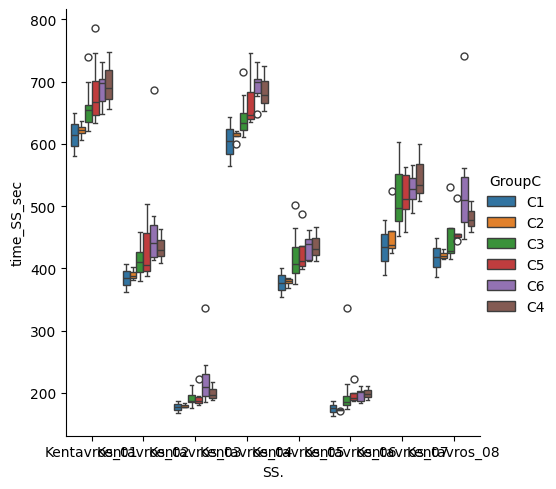

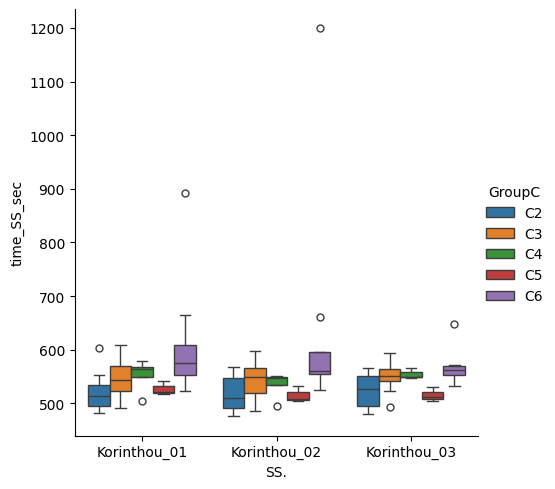

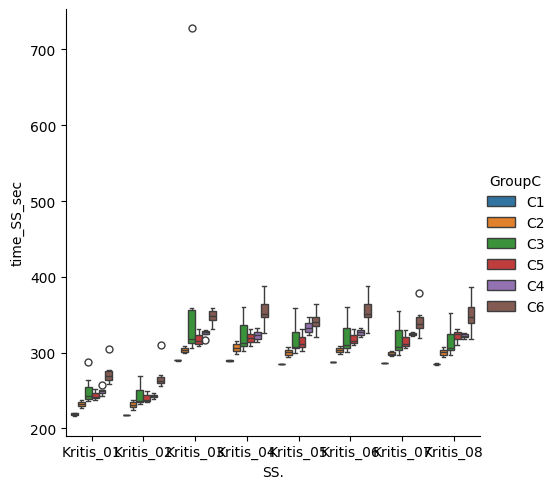

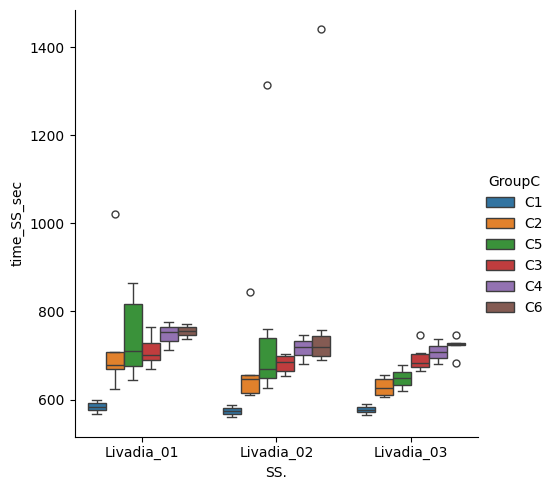

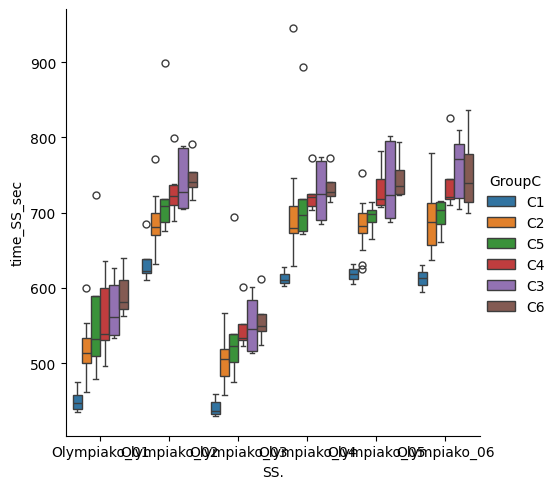

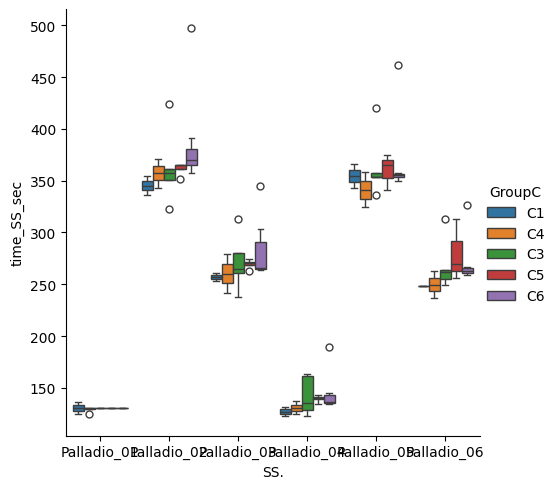

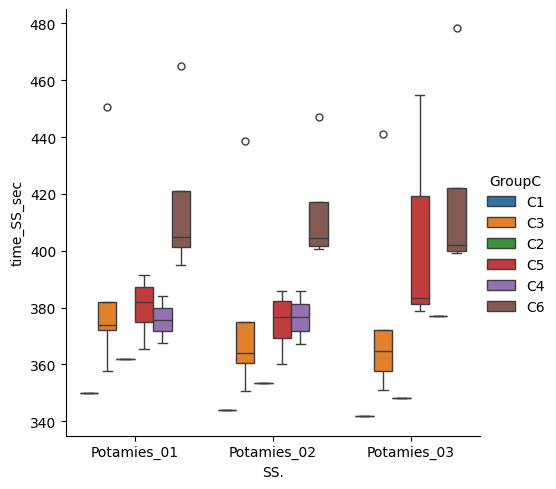

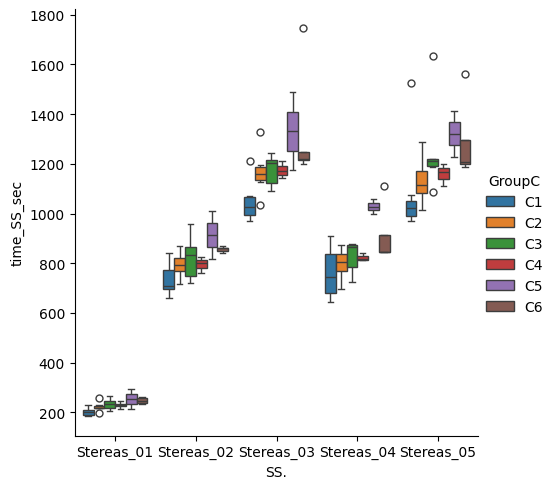

In [24]:
dfs=[]
for df in rallies:
    df = data2[data2['Race']==df]
    df.reset_index(drop=True)
    s=df.iloc[0][3]
    plota = sns.catplot(data=df, kind="box", y="time_SS_sec", x='SS.', hue='GroupC')
    plota.figure.savefig(s +'_boxplot.png',dpi=600)
    dfs.append(df)
    
 

/tmp/ipykernel_10279/1790415823.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s=df.iloc[0][3]
/tmp/ipykernel_10279/1790415823.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s=df.iloc[0][3]
/tmp/ipykernel_10279/1790415823.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s=df.iloc[0][3]
/tmp/ipykernel_10279/1790415823.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, i

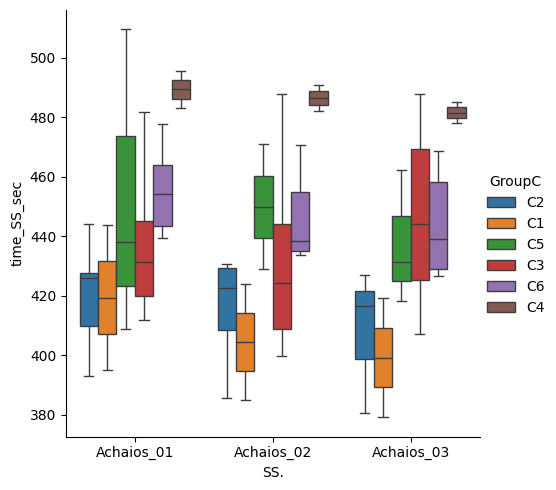

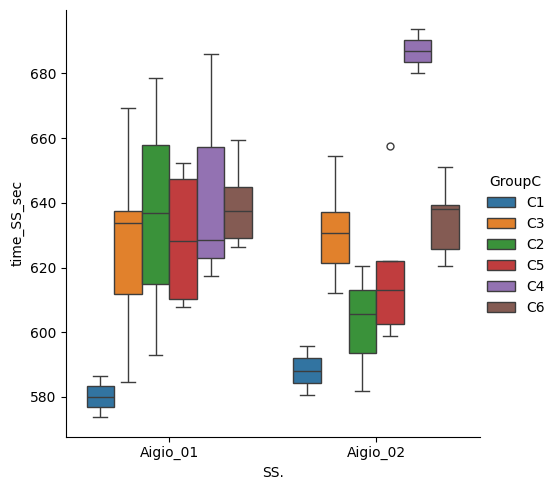

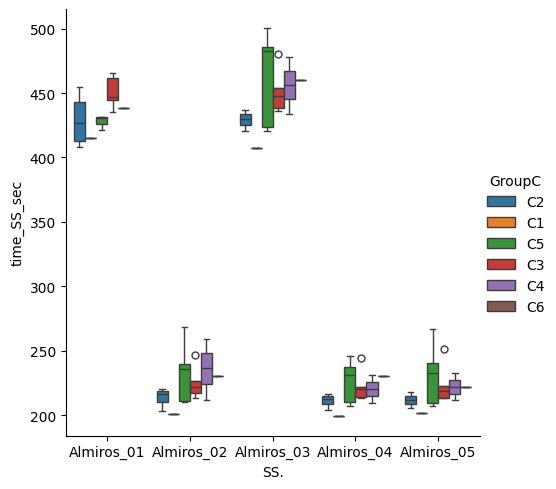

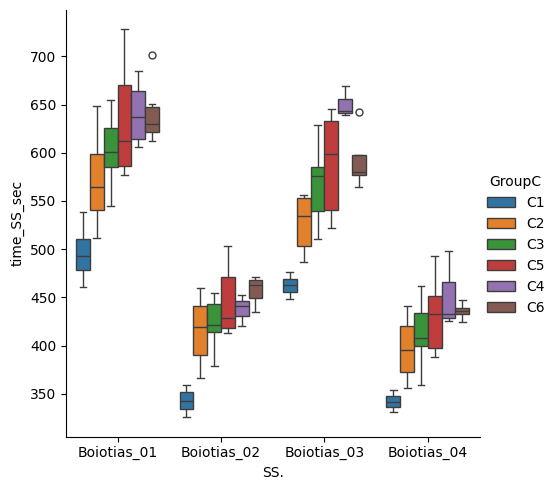

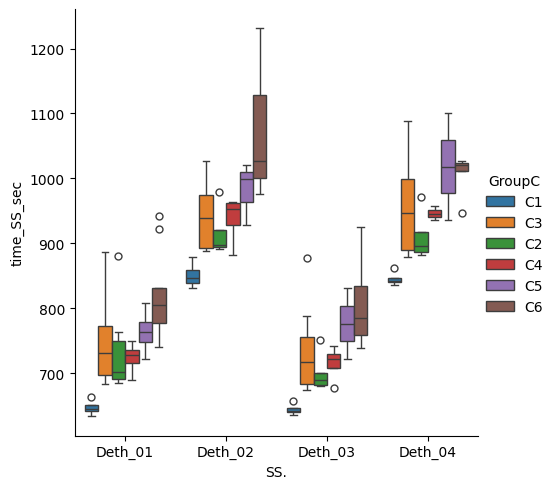

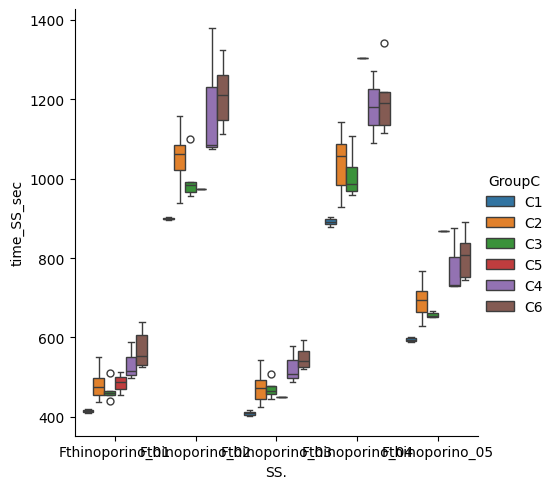

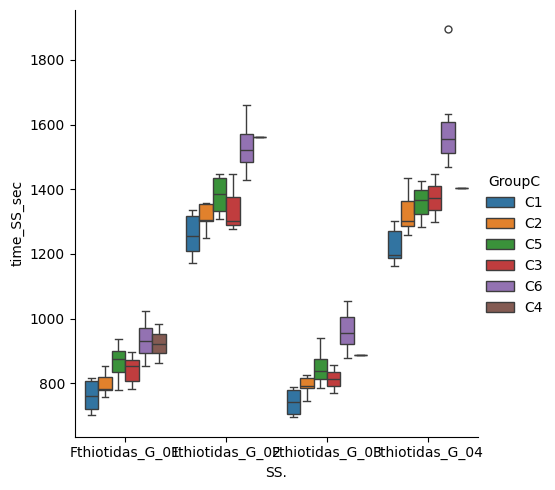

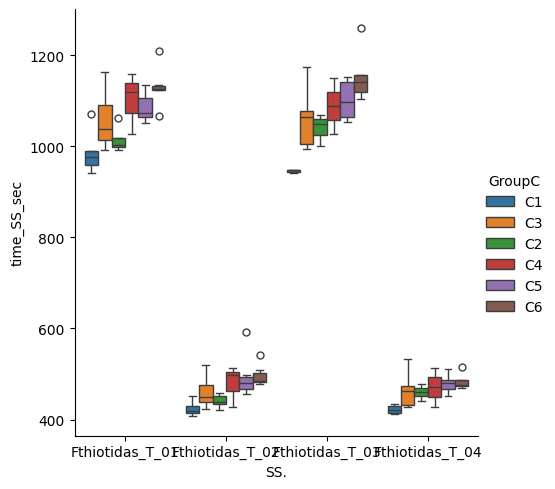

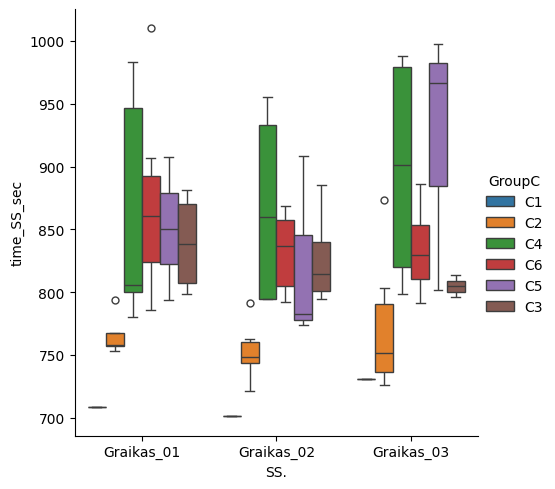

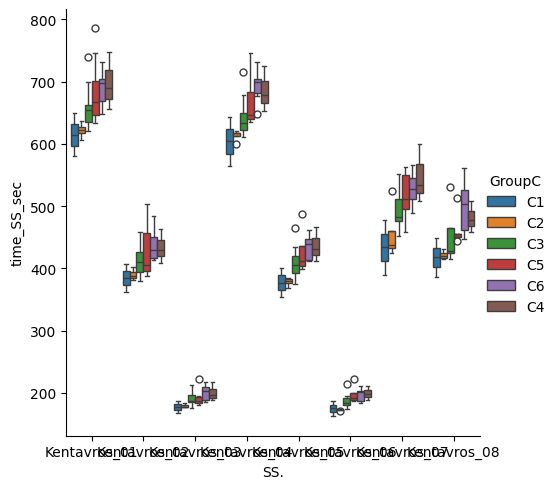

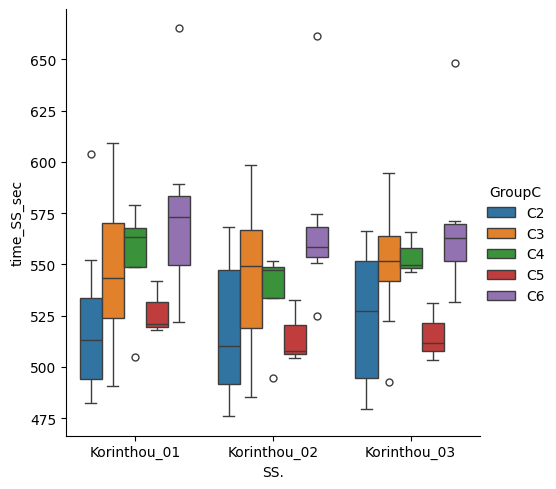

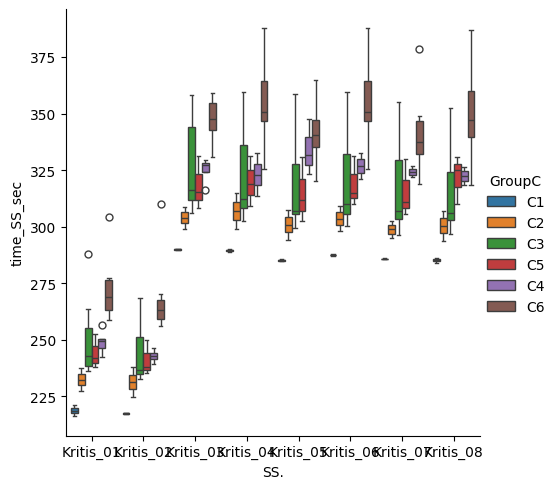

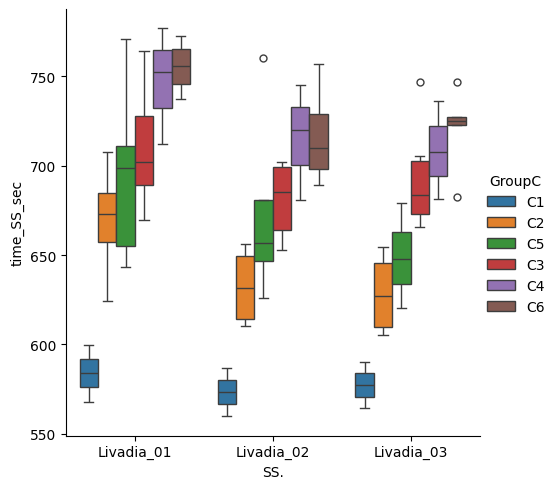

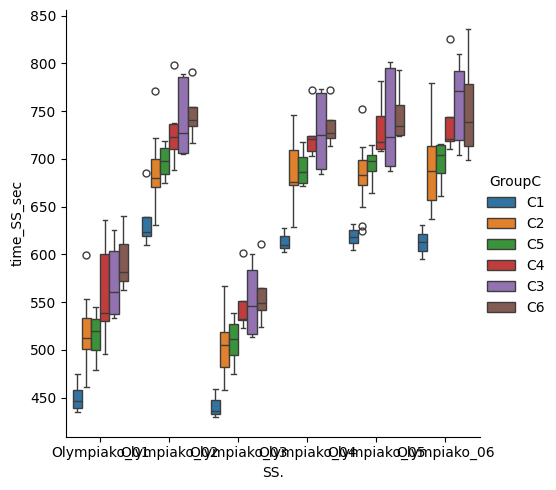

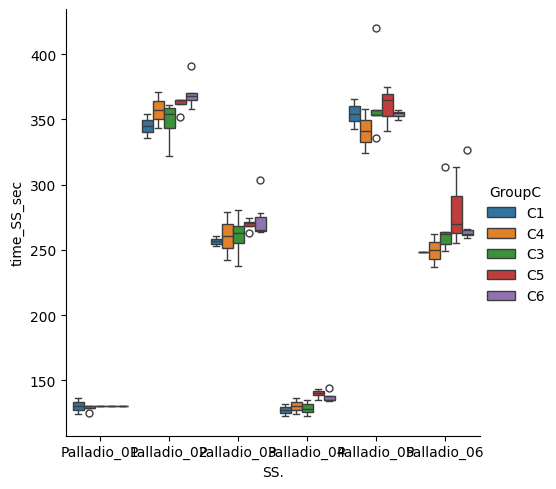

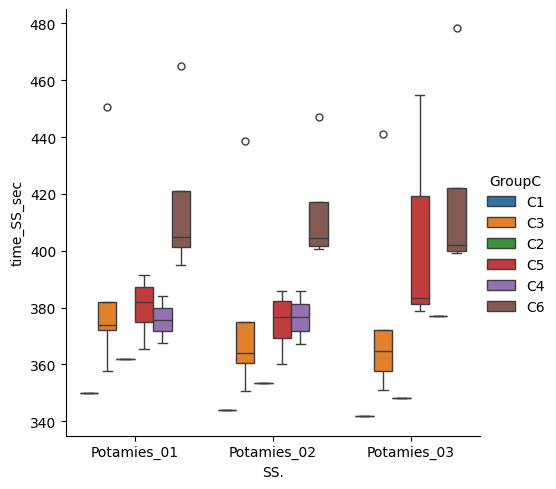

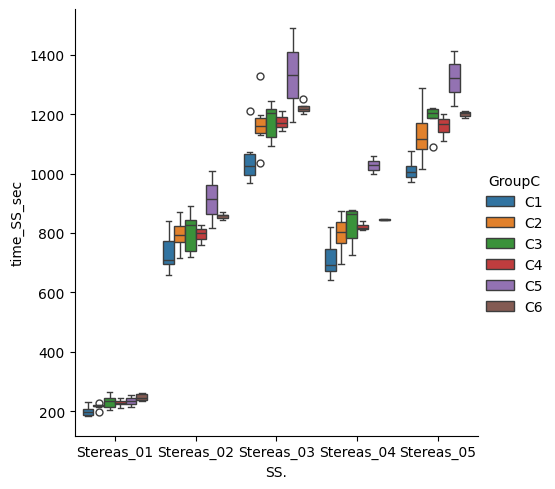

In [25]:
dfs=[]
for df in rallies:
    df = data2[data2['Race']==df]
    df = df.drop(df[df['time_SS_sec']>=1.3*df['min_time_Gr']].index)
    df.reset_index(drop=True)
    s=df.iloc[0][3]
    plota = sns.catplot(data=df, kind="box", y="time_SS_sec", x='SS.', hue='GroupC')
    plota.figure.savefig(s +'_F_boxplot.png',dpi=600)
    dfs.append(df)
    
 

In [26]:
dfs[0]

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,SS.,GroupC,min_time_Gr
0,Peroulak,C2,1,Achaios,24/9/2023,Tarmac,Cup,1,392.82,392.82,Achaios_01,C2,392.82
1,Daskalop,C2,1,Achaios,24/9/2023,Tarmac,Cup,5,409.94,392.82,Achaios_01,C2,392.82
2,Papadopo,C2,1,Achaios,24/9/2023,Tarmac,Cup,10,425.84,392.82,Achaios_01,C2,392.82
3,Kandilio,C2,1,Achaios,24/9/2023,Tarmac,Cup,11,427.63,392.82,Achaios_01,C2,392.82
4,Labropou,C2,1,Achaios,24/9/2023,Tarmac,Cup,18,444.10,392.82,Achaios_01,C2,392.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Kalyviot,C6 F2,3,Achaios,24/9/2023,Tarmac,Cup,14,438.93,379.10,Achaios_03,C6,426.46
64,Kouniaki,C6 F2,3,Achaios,24/9/2023,Tarmac,Cup,19,458.41,379.10,Achaios_03,C6,426.46
65,Dekis Pa,C6 F2,3,Achaios,24/9/2023,Tarmac,Cup,21,468.73,379.10,Achaios_03,C6,426.46
66,Karouzos,C4 F2,3,Achaios,24/9/2023,Tarmac,Cup,23,478.07,379.10,Achaios_03,C4,478.07
